<font color='green' size=6> Entendendo a Redução de Dimensionalidade </font>

---

# 1 - Primeiros Passos

## 1.1 - Importação da Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exams = pd.read_csv('/home/joeldspy/Modelos/datasets/exams.csv')
exams.head(3)

,id,target,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6,exam_7,exam_8,...,exam_24,exam_25,exam_26,exam_27,exam_28,exam_29,exam_30,exam_31,exam_32,exam_33
0,842302,1,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,...,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


## 1.2 - Primeiras Impressões

In [3]:
pd.value_counts(exams.target)

0    357
1    212
Name: target, dtype: int64

In [4]:
exams = exams.drop(columns=['exam_33'])

In [5]:
x = exams.drop(columns=['id', 'target'])
y = exams['target']

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.25)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(x_train, y_train)

accuracy = rfc.score(x_test, y_test)

print('A acurácia média do modelo de RandomForestClassifier foi de %.2f%%' % (accuracy * 100))

A acurácia média do modelo de RandomForestClassifier foi de 96.50%


In [8]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(x_train, y_train)

accuracy = dummy.score(x_test, y_test)

print('A acurácia média do modelo de DummyClassifier foi de %.2f%%' % (accuracy * 100))

A acurácia média do modelo de DummyClassifier foi de 60.84%


## 1.3 - Visualização de Dados

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_norm = scaler.fit_transform(x)

exams_norm = pd.concat([y, pd.DataFrame(x_norm, columns=x.columns)], axis=1)

def violin_plot(init, end):
    melt_data = pd.melt(exams_norm.iloc[:, init:end], id_vars='target', var_name='exam', value_name='values')

    sns.set_style('whitegrid')
    axes = sns.violinplot(x='exam', y='values', hue='target', data=melt_data, split=True)
    axes.figure.set_size_inches(12, 6)

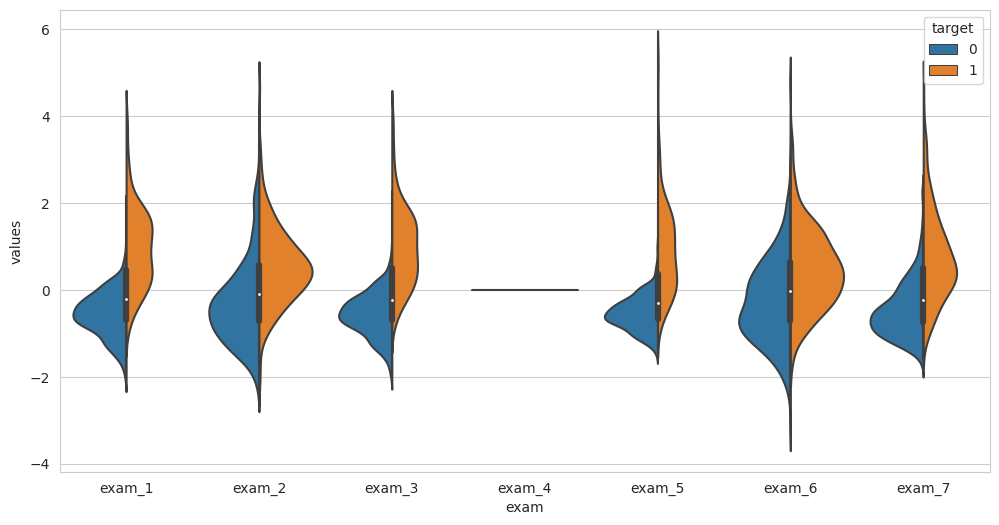

In [10]:
violin_plot(0, 8)

In [11]:
exams.drop(columns=['exam_4', 'exam_29'], inplace=True)

# 2 - Trabalhando com Machine Learning

<Axes: >

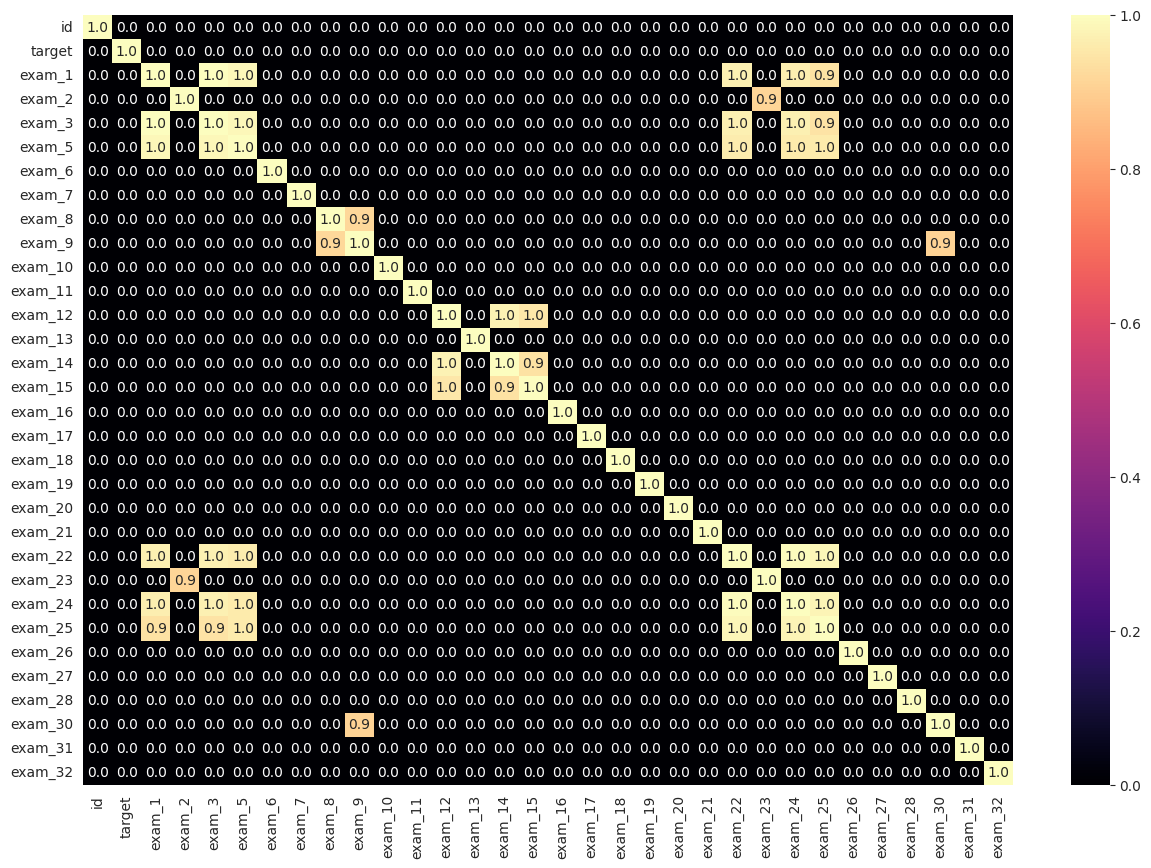

In [12]:
corr = exams.corr()
corr = corr[abs(corr) > 0.9].fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='magma', fmt='.1f', annot=True)

In [22]:
exams = exams[['target', 'exam_1', 'exam_2', 'exam_6', 'exam_7', 'exam_8',
       'exam_10', 'exam_11', 'exam_12', 'exam_13', 'exam_16', 'exam_17',
       'exam_18', 'exam_19', 'exam_20', 'exam_21', 'exam_26', 'exam_27',
       'exam_28', 'exam_30', 'exam_31', 'exam_32']]

In [23]:
x = exams.drop(columns=['target'])
y = exams['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=75, test_size=0.25)

rfc = RandomForestClassifier(n_estimators=100)
**
rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

0.965034965034965

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)

selector.fit(x_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x7f3334324e50>)

In [27]:
exams_kbest = exams[selector.get_feature_names_out()]
exams_kbest.head()

,exam_1,exam_2,exam_8,exam_12,exam_28
0,17.99,10.38,0.3001,1.0950,0.7119
1,20.57,17.77,0.0869,0.5435,0.2416
2,19.69,21.25,0.1974,0.7456,0.4504
3,11.42,20.38,0.2414,0.4956,0.6869
4,20.29,14.34,0.1980,0.7572,0.4000


In [28]:
x = exams_kbest
y = exams['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=75, test_size=0.25)

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

0.965034965034965